<a href="https://colab.research.google.com/github/ashrafulalam92/Predicting-Food-Delivery-Speed-Using-Machine-Learning-and-Neural-Networks/blob/main/Ashraful_Alam_Cse422_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===== PART 1: DATASET DESCRIPTION =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Food_Delivery_Times_Classification.csv')
print("First 3 rows:")
print(df.head(3))

First 3 rows:
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   

   Preparation_Time_min  Courier_Experience_yrs Delivery_Speed  
0                    12                     1.0        Average  
1                    20                     2.0           Slow  
2                    28                     1.0        Average  


In [ ]:
print(f"\nThere are {df.shape[1]-1} features in the dataset")
print("Classification Problem. Predicting Delivery_Speed (Fast/Average/Slow)")
print(f"There are {df.size} data points")
print("\nData types:", set(df.dtypes))


There are 8 features in the dataset
Classification Problem. Predicting Delivery_Speed (Fast/Average/Slow)
There are 9000 data points

Data types: {dtype('float64'), dtype('int64'), dtype('O')}


In [ ]:
# ===== PART 2: EXPLORATORY DATA ANALYSIS =====
quantitative_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nQuantitative features: {quantitative_features}")
print(f"Categorical features: {categorical_features}")

# Null values check (identical to PDF structure)
print("\nMissing values per column:")
print(df.isna().sum())


Quantitative features: ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
Categorical features: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Delivery_Speed']

Missing values per column:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Speed             0
dtype: int64


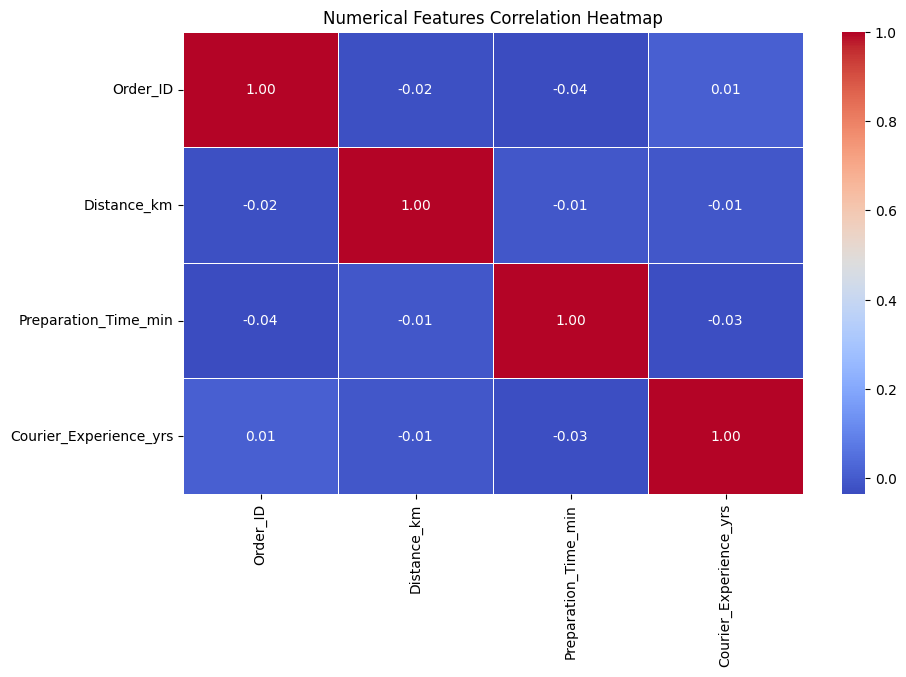

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Food_Delivery_Times_Classification.csv')

# Select only numerical features
quantitative_features = df.select_dtypes(include=['number']).columns.tolist()

# Compute the correlation matrix for numerical features
corr_matrix = df[quantitative_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Numerical Features Correlation Heatmap")
plt.show()

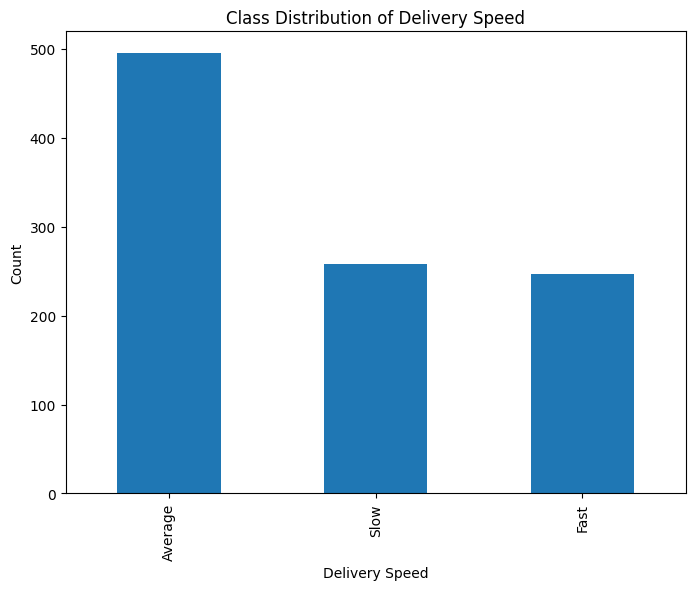

In [ ]:
# Class distribution plot (exact PDF style)
plt.figure(figsize=(8,6))
df['Delivery_Speed'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Delivery Speed')
plt.xlabel('Delivery Speed')
plt.ylabel('Count')
plt.show()

In [ ]:
# ===== PART 3: DATA PREPROCESSING =====
# Handle missing values (as in PDF)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# Label encoding (same as PDF)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Feature scaling (identical to PDF)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = df.drop('Delivery_Speed', axis=1).columns
df[features] = scaler.fit_transform(df[features])

In [ ]:
# ===== PART 4: MODEL TRAINING =====
# Dataset splitting (same parameters)
from sklearn.model_selection import train_test_split

X = df.drop('Delivery_Speed', axis=1)
y = df['Delivery_Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# 1. Naive Bayes (identical to PDF implementation)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("\nNaive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.77      0.75       149
           1       0.80      0.82      0.81        74
           2       0.69      0.64      0.66        77

    accuracy                           0.75       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.75      0.75       300



In [ ]:
# 2. Decision Tree (same PDF parameters)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       149
           1       0.71      0.76      0.73        74
           2       0.66      0.73      0.69        77

    accuracy                           0.71       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.71      0.71      0.71       300



In [ ]:
# 3. Neural Network (exact PDF architecture)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4486 - loss: 1.0669 - val_accuracy: 0.5000 - val_loss: 1.0086
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4861 - loss: 1.0076 - val_accuracy: 0.5033 - val_loss: 0.9718
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4857 - loss: 0.9688 - val_accuracy: 0.5167 - val_loss: 0.9272
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5414 - loss: 0.9028 - val_accuracy: 0.5467 - val_loss: 0.8613
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5729 - loss: 0.8526 - val_accuracy: 0.6500 - val_loss: 0.7887
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6534 - loss: 0.7651 - val_accuracy: 0.6900 - val_loss: 0.7226
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7359 - loss: 0.7042 - val_accuracy: 0.7033 - val_loss: 0.6724
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7381 - loss: 0.6511 - val_accuracy: 0.7167 - val_loss: 0.

In [ ]:
# ===== PART 5: MODEL EVALUATION =====
# Neural Network predictions
nn_pred = np.argmax(model.predict(X_test), axis=1)
print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, nn_pred):.2f}")
print(classification_report(y_test, nn_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Neural Network Performance:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       149
           1       0.84      0.88      0.86        74
           2       0.70      0.69      0.69        77

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



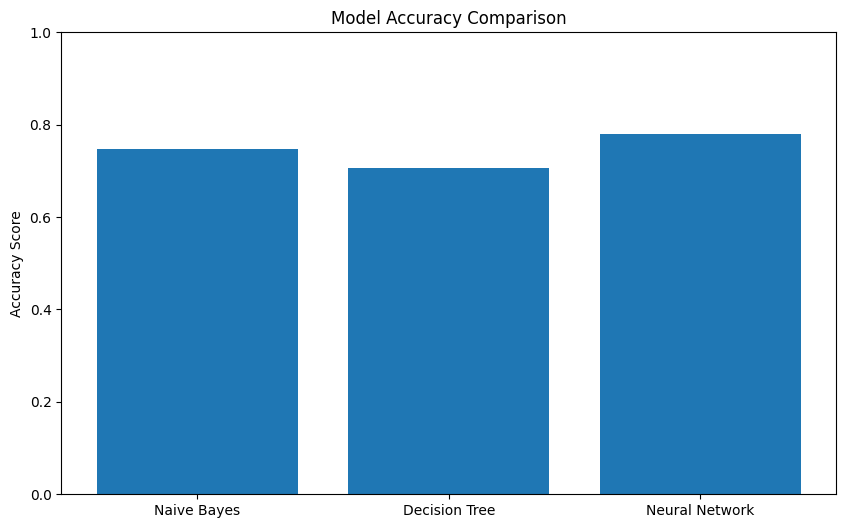

In [ ]:
# Accuracy comparison (identical visualization)
accuracies = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Neural Network': accuracy_score(y_test, nn_pred)
}

plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
# Confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, pred in [('Naive Bayes', y_pred_nb),
                   ('Decision Tree', y_pred_dt),
                   ('Neural Network', nn_pred)]:
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=le.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


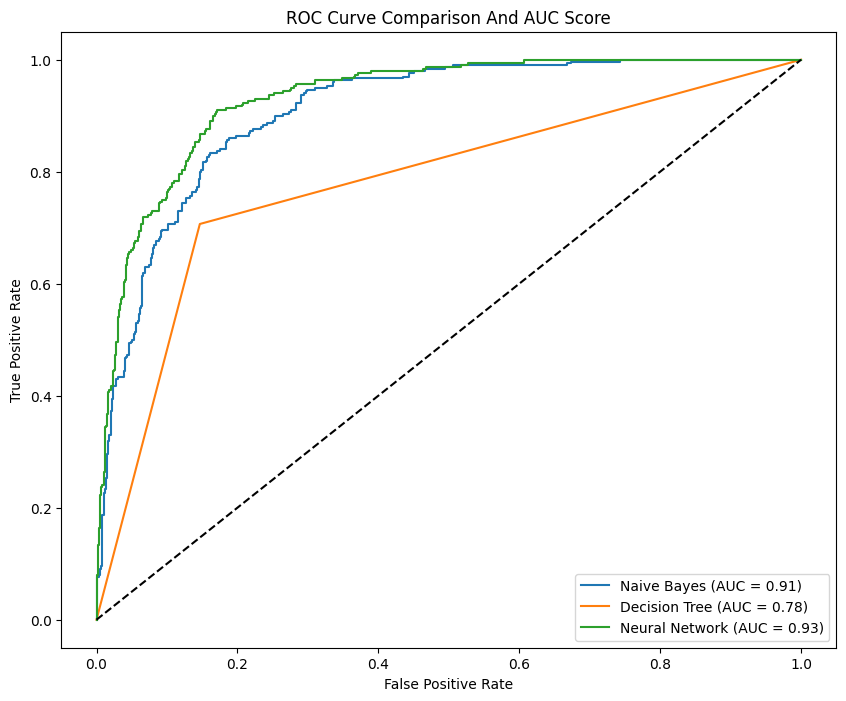

In [ ]:

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

plt.figure(figsize=(10,8))
for name, model in [('Naive Bayes', nb),
                    ('Decision Tree', dt),
                    ('Neural Network', model)]:

    if name == 'Neural Network':
        y_score = model.predict(X_test)
    else:
        y_score = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison And AUC Score')
plt.legend(loc='lower right')
plt.show()